**DEMONSTRATION OF MULTILAYER PRECEPTRON**

**PRE-REQUIRED LIBRARIES**

In [ ]:
pip install numpy pandas tensorflow scikit-learn matplotlib

**IMPORTING THE REQUIRED LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

**LOADING THE DATASET**

In [ ]:
# Load the Wine Quality Dataset
def load_data(url):
    df = pd.read_csv(url, delimiter=';')
    return df

In [ ]:
# Preprocess the data
def preprocess_data(df):
    X = df.drop('quality', axis=1).values
    y = df['quality'].values
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X, y

**MLP MODEL**

In [ ]:
# Define the MLP model
def create_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

**PLOTTING THE TRAINING HISTORY**

In [ ]:
# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['mae'], label='MAE (Training)')
    plt.plot(history.history['val_mae'], label='MAE (Validation)')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error')
    plt.legend()
    plt.title('Model Performance Over Epochs')
    plt.grid()
    plt.show()

**MAIN FUNCTION**

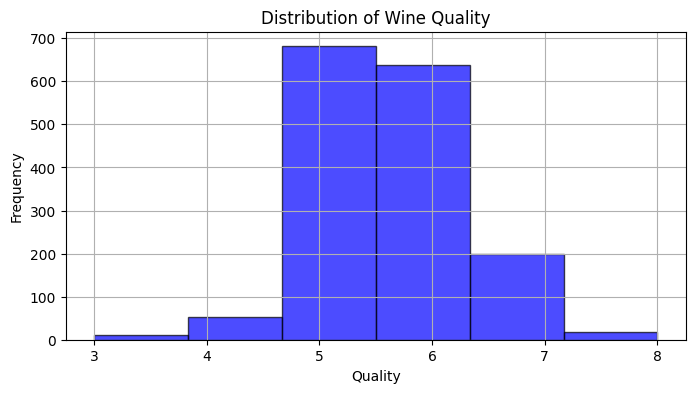

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 29.5701 - mae: 5.2760 - val_loss: 11.9839 - val_mae: 3.1617
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.0846 - mae: 2.6395 - val_loss: 3.0484 - val_mae: 1.3923
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7756 - mae: 1.5267 - val_loss: 2.2489 - val_mae: 1.1954
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9938 - mae: 1.3818 - val_loss: 1.9365 - val_mae: 1.0981
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7189 - mae: 1.3085 - val_loss: 1.6868 - val_mae: 1.0296
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5928 - mae: 1.2742 - val_loss: 1.5143 - val_mae: 0.9810
Epoch 7/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2152 - mae: 1.1849 - val_loss: 1.3745 - val_mae: 0.9324
Epoch 8/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2551 - mae: 1.2094 - val_loss: 1.2360 - val_mae: 0.8898
Epoch 9/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2147 - mae: 1

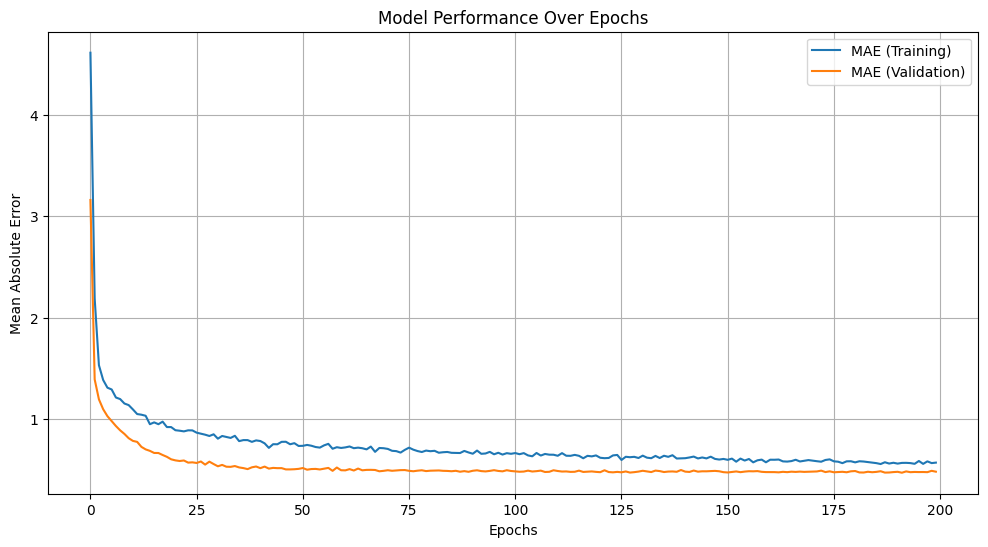

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Test MAE: 0.4821, R² Score: 0.4523


In [ ]:
# Main function
def main():
    dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
    df = load_data(dataset_url)

    # Visualize the distribution of the target variable
    plt.figure(figsize=(8, 4))
    plt.hist(df['quality'], bins=6, alpha=0.7, color='blue', edgecolor='black')
    plt.title('Distribution of Wine Quality')
    plt.xlabel('Quality')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

    X, y = preprocess_data(df)

    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the model
    model = create_model(X_train.shape[1])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=1)

    # Plot training history
    plot_history(history)

    # Evaluate model
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Test MAE: {mae:.4f}, R² Score: {r2:.4f}')

if __name__ == "__main__":
    main()
